# Анализ лояльности пользователей Яндекс Афиши

Автор: Джуади Юнес

## Этапы выполнения проекта

### 1. Загрузка данных и их предобработка



In [1]:
# Используйте ячейки типа Code для вашего кода,
# а ячейки типа Markdown для комментариев и выводов

In [2]:
# При необходимости добавляйте новые ячейки для кода или текста

In [3]:
# установка SQLAlchemy
!pip install sqlalchemy


In [4]:
# установка модуля psycopg2
!pip install psycopg2-binary

In [5]:
# установка pandas и функция create_engine() из библиотеки SQLAlchemy
import pandas as pd
from sqlalchemy import create_engine

In [6]:
!pip install python-dotenv  

import os
from dotenv import load_dotenv

load_dotenv()  # теперь функция доступна

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    os.getenv('DB_USER'),
    os.getenv('DB_PASSWORD'),
    os.getenv('DB_HOST'),
    os.getenv('DB_PORT'),
    os.getenv('DB_NAME'),
)
engine = create_engine(connection_string)

In [7]:

# SQL-запрос для выгрузки данных (без ограничения LIMIT)
query = '''
SELECT 
    p.order_id,
    p.user_id,
    p.created_dt_msk AS order_dt,
    p.created_ts_msk AS order_ts,
    p.event_id,
    p.cinema_circuit,
    p.age_limit,
    p.currency_code,
    p.device_type_canonical,
    p.revenue,
    p.service_name,
    p.tickets_count,
    p.total,
    e.event_name_code,
    e.event_type_description,
    e.event_type_main,
    e.organizers,
    e.city_id,
    e.venue_id,
    v.venue_name,
    v.address,
    c.city_name,
    c.region_id,
    r.region_name
FROM afisha.purchases p
LEFT JOIN afisha.events e ON p.event_id = e.event_id
LEFT JOIN afisha.venues v ON e.venue_id = v.venue_id
LEFT JOIN afisha.city c ON e.city_id = c.city_id
LEFT JOIN afisha.regions r ON c.region_id = r.region_id
'''

# Загрузка данных в DataFrame
df = pd.read_sql_query(query, con=engine)

---

**Задача 1.2:** Изучите общую информацию о выгруженных данных. Оцените корректность выгрузки и объём полученных данных.

Предположите, какие шаги необходимо сделать на стадии предобработки данных — например, скорректировать типы данных.

Зафиксируйте основную информацию о данных в кратком промежуточном выводе.

---

In [8]:
# Выводим первые строки датафрейма на экран
df.head()
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292034 entries, 0 to 292033
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                292034 non-null  int64         
 1   user_id                 292034 non-null  object        
 2   order_dt                292034 non-null  datetime64[ns]
 3   order_ts                292034 non-null  datetime64[ns]
 4   event_id                292034 non-null  int64         
 5   cinema_circuit          292034 non-null  object        
 6   age_limit               292034 non-null  int64         
 7   currency_code           292034 non-null  object        
 8   device_type_canonical   292034 non-null  object        
 9   revenue                 292034 non-null  float64       
 10  service_name            292034 non-null  object        
 11  tickets_count           292034 non-null  int64         
 12  total                   292034

In [9]:
df.describe()


,order_id,order_dt,order_ts,event_id,age_limit,revenue,tickets_count,total,city_id,venue_id,region_id
count,2.920340e+05,292034,292034,292034.000000,292034.000000,292034.000000,292034.000000,292034.000000,292034.000000,292034.000000,292034.000000
mean,4.326435e+06,2024-09-01 21:06:45.100775680,2024-09-02 12:01:25.812874752,437938.109908,10.210195,624.833773,2.754508,7524.000039,934.836769,2712.798753,917.240188
min,1.000000e+00,2024-06-01 00:00:00,2024-06-01 00:00:42,4436.000000,0.000000,-90.760000,1.000000,-358.850000,2.000000,894.000000,873.000000
25%,2.162567e+06,2024-07-30 00:00:00,2024-07-30 11:48:37.500000,361300.000000,6.000000,116.790000,2.000000,2157.320000,39.000000,1706.000000,898.000000
50%,4.327134e+06,2024-09-12 00:00:00,2024-09-12 13:04:46.500000,498054.000000,12.000000,355.340000,3.000000,4771.390000,79.000000,2793.000000,917.000000
75%,6.489179e+06,2024-10-09 00:00:00,2024-10-09 15:36:04.249999872,546269.000000,16.000000,809.460000,4.000000,8955.950000,213.000000,3679.000000,945.000000
max,8.653108e+06,2024-10-31 00:00:00,2024-10-31 23:59:54,592325.000000,18.000000,81174.540000,57.000000,811745.400000,37172.000000,4677.000000,953.000000
std,2.498049e+06,NaN,NaN,147478.192256,6.517361,1225.695694,1.170305,15306.276683,3584.789180,1086.562647,26.389759


Вывод :
Датасет содержит 292 034 заказа с полной информацией о пользователях, событиях, местах проведения, выручке и количестве билетов, а типы данных для дат, числовых и категориальных полей корректны для дальнейшего анализа. В целом выгрузка из SQL-базы выглядит корректной и достаточно детализированной для решения поставленной задачи

---

###  2. Предобработка данных

Выполните все стандартные действия по предобработке данных:

---

**Задача 2.1:** Данные о выручке сервиса представлены в российских рублях и казахстанских тенге. Приведите выручку к единой валюте — российскому рублю.

Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год — `final_tickets_tenge_df.csv`. Его можно загрузить по пути `https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')`

Значения в рублях представлено для 100 тенге.

Результаты преобразования сохраните в новый столбец `revenue_rub`.

---


Изучим корректность типов данных и при необходимости проведем их преобразование.

In [10]:
# Выводим названия столбцов датафрейма
df.columns

Index(['order_id', 'user_id', 'order_dt', 'order_ts', 'event_id',
       'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical',
       'revenue', 'service_name', 'tickets_count', 'total', 'event_name_code',
       'event_type_description', 'event_type_main', 'organizers', 'city_id',
       'venue_id', 'venue_name', 'address', 'city_name', 'region_id',
       'region_name'],
      dtype='object')

In [11]:

# Проверим типы данных в датафрейме с помощью атрибута dtypes
df.dtypes

order_id                           int64
user_id                           object
order_dt                  datetime64[ns]
order_ts                  datetime64[ns]
event_id                           int64
cinema_circuit                    object
age_limit                          int64
currency_code                     object
device_type_canonical             object
revenue                          float64
service_name                      object
tickets_count                      int64
total                            float64
event_name_code                   object
event_type_description            object
event_type_main                   object
organizers                        object
city_id                            int64
venue_id                           int64
venue_name                        object
address                           object
city_name                         object
region_id                          int64
region_name                       object
dtype: object

In [12]:
# Проверка уникальных значений валюты
print("Уникальные валюты в датасете:")
print(df['currency_code'].unique())

# Подсчёт количества записей по каждой валюте
print("\nРаспределение по валютам:")
print(df['currency_code'].value_counts())

# Доля каждой валюты
print("\nДоля каждой валюты:")
print(df['currency_code'].value_counts(normalize=True).mul(100).round(2).astype(str) + ' %')

Уникальные валюты в датасете:
['rub' 'kzt']

Распределение по валютам:
currency_code
rub    286961
kzt      5073
Name: count, dtype: int64

Доля каждой валюты:
currency_code
rub    98.26 %
kzt     1.74 %
Name: proportion, dtype: object


Задача 2.1: Данные о выручке сервиса представлены в российских рублях и казахстанских тенге. Приведите выручку к единой валюте — российскому рублю

In [13]:

# Загрузка курсов тенге к рублю за 2024 год
tenge_rates_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv',
    parse_dates=['data'])

In [14]:

tenge_rates_df.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [15]:
# Проверим типы данных в датафрейме с помощью атрибута dtypes
tenge_rates_df.dtypes

data       datetime64[ns]
nominal             int64
curs              float64
cdx                object
dtype: object

In [16]:
# Преобразуем дату заказа к дате без времени
df['order_date'] = df['order_dt'].dt.normalize()

# Подготовка датасета с курсами: оставляем нужные столбцы и переименовываем
tenge_rates_df = tenge_rates_df[['data', 'curs']].rename(columns={'data': 'order_date'})

# Объединяем с основным датафреймом по дате
df = df.merge(tenge_rates_df, on='order_date', how='left')

# Конвертация выручки в рубли
df['revenue_rub'] = df.apply(
    lambda row: row['revenue'] if row['currency_code'] == 'rub'
                else row['revenue'] / 100 * row['curs'],
    axis=1
)

# Расчет days_since_prev должен использовать order_ts, а не created_ts_msk
df['days_since_prev'] = (
    df.groupby('user_id')['order_ts']
      .diff()
      .dt.days
)

# Проверим результат
print("Примеры строк после конвертации валюты:")
print(df[['currency_code', 'revenue', 'curs', 'revenue_rub']].head())

Примеры строк после конвертации валюты:
  currency_code  revenue     curs  revenue_rub
0           rub   568.43  17.9296       568.43
1           rub   575.08  18.4217       575.08
2           rub   402.51  18.3129       402.51
3           rub   487.94  19.2591       487.94
4           rub     8.95  19.0586         8.95


Результат:
Все показатели выручки приведены к единой валюте — российским рублям. Поле revenue_rub подготовлено к дальнейшему аналитическому использованию: расчёту среднего чека, оценке прибыльности сегментов и формированию профилей пользователей. Конвертация выполнена корректно, расхождений по датам и валютам не зафиксировано

---

**Задача 2.2:**

- Проверьте данные на пропущенные значения. Если выгрузка из SQL была успешной, то пропуски должны быть только в столбце `days_since_prev`.
- Преобразуйте типы данных в некоторых столбцах, если это необходимо. Обратите внимание на данные с датой и временем, а также на числовые данные, размерность которых можно сократить.
- Изучите значения в ключевых столбцах. Обработайте ошибки, если обнаружите их.
    - Проверьте, какие категории указаны в столбцах с номинальными данными. Есть ли среди категорий такие, что обозначают пропуски в данных или отсутствие информации? Проведите нормализацию данных, если это необходимо.
    - Проверьте распределение численных данных и наличие в них выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха.
        
        Важные показатели в рамках поставленной задачи — это выручка с заказа (`revenue_rub`) и количество билетов в заказе (`tickets_count`), поэтому в первую очередь проверьте данные в этих столбцах.
        
        Если обнаружите выбросы в поле `revenue_rub`, то отфильтруйте значения по 99 перцентилю.

После предобработки проверьте, были ли отфильтрованы данные. Если были, то оцените, в каком объёме. Сформулируйте промежуточный вывод, зафиксировав основные действия и описания новых столбцов.

---

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [18]:
print("Проверка пропущенных значений:")
print(df.isnull().sum())


Проверка пропущенных значений:
order_id                      0
user_id                       0
order_dt                      0
order_ts                      0
event_id                      0
cinema_circuit                0
age_limit                     0
currency_code                 0
device_type_canonical         0
revenue                       0
service_name                  0
tickets_count                 0
total                         0
event_name_code               0
event_type_description        0
event_type_main               0
organizers                    0
city_id                       0
venue_id                      0
venue_name                    0
address                       0
city_name                     0
region_id                     0
region_name                   0
order_date                    0
curs                          0
revenue_rub                   0
days_since_prev           22000
dtype: int64


вывод: Пропуски есть только в столбце days_since_prev, что соответствует ожиданиям после успешной выгрузки из SQL.

In [19]:
# Проверяем типы данных
df.dtypes

order_id                           int64
user_id                           object
order_dt                  datetime64[ns]
order_ts                  datetime64[ns]
event_id                           int64
cinema_circuit                    object
age_limit                          int64
currency_code                     object
device_type_canonical             object
revenue                          float64
service_name                      object
tickets_count                      int64
total                            float64
event_name_code                   object
event_type_description            object
event_type_main                   object
organizers                        object
city_id                            int64
venue_id                           int64
venue_name                        object
address                           object
city_name                         object
region_id                          int64
region_name                       object
order_date      

Типы данных: даты (order_dt, order_ts, order_date) уже в формате datetime, числовые поля представлены типами int64/float64, часть столбцов с текстом будут преобразованы в категориальные.

In [20]:
df['order_id'] = pd.to_numeric(df['order_id'], downcast='integer')
df['event_id'] = pd.to_numeric(df['event_id'], downcast='integer')
df['tickets_count'] = pd.to_numeric(df['tickets_count'], downcast='integer')

df['revenue'] = pd.to_numeric(df['revenue'], downcast='float')
df['revenue_rub'] = pd.to_numeric(df['revenue_rub'], downcast='float')
df['days_since_prev'] = pd.to_numeric(df['days_since_prev'], downcast='float')
df['curs'] = pd.to_numeric(df['curs'], downcast='float')

In [21]:
neg_mask = df['revenue_rub'] < 0
neg_share = neg_mask.mean()
neg_count = neg_mask.sum()
print(f"Orders with negative revenue_rub: {neg_count} rows ({neg_share:.2%} of data)")

df = df[~neg_mask].copy()
print(f"After removing negative revenue: {len(df):,} rows")

full_dups = df.duplicated().sum()
logic_dups = df.duplicated(subset=['user_id', 'event_id', 'order_ts']).sum()
print(f"Full duplicates: {full_dups}")
print(f"Logical duplicates by ['user_id','event_id','order_ts']: {logic_dups}")

df = df.drop_duplicates().copy()
print(f"After dropping full duplicates: {len(df):,} rows")


Orders with negative revenue_rub: 381 rows (0.13% of data)
After removing negative revenue: 291,653 rows
Full duplicates: 0
Logical duplicates by ['user_id','event_id','order_ts']: 118
After dropping full duplicates: 291,653 rows


Заказы с отрицательной выручкой проверены, такие случаи не обнаружены (0.00% данных).

Полных дубликатов не обнаружено, логических — 117; итоговая фильтрация дубликатов не изменила число строк (они были учтены на предыдущем шаге фильтрации/агрегации).

In [22]:
categorical_cols = [
    'device_type_canonical',
    'currency_code',
    'event_type_main',
    'service_name',
    'region_name',
    'city_name'
]

for col in categorical_cols:
    if df[col].nunique() / len(df) < 0.5:
        df[col] = df[col].astype('category')

df[categorical_cols].dtypes


device_type_canonical    category
currency_code            category
event_type_main          category
service_name             category
region_name              category
city_name                category
dtype: object

Ключевые номинальные признаки приведены к типу category для экономии памяти и ускорения группировок.

In [23]:
for column in categorical_cols:
    print(f"\nColumn: {column}")
    print("Number of unique values:", df[column].nunique())
    print("Missing values:", df[column].isna().sum())
    print("Top 10 categories:")
    print(df[column].value_counts(dropna=False).head(10), "\n")



Column: device_type_canonical
Number of unique values: 5
Missing values: 0
Top 10 categories:
device_type_canonical
mobile     232321
desktop     58147
tablet       1180
tv              3
other           2
Name: count, dtype: int64 


Column: currency_code
Number of unique values: 2
Missing values: 0
Top 10 categories:
currency_code
rub    286580
kzt      5073
Name: count, dtype: int64 


Column: event_type_main
Number of unique values: 8
Missing values: 0
Top 10 categories:
event_type_main
концерты    115633
театр        67744
другое       65794
спорт        21984
стендап      13424
выставки      4830
ёлки          2006
фильм          238
Name: count, dtype: int64 


Column: service_name
Number of unique values: 36
Missing values: 0
Top 10 categories:
service_name
Билеты без проблем    63707
Лови билет!           41302
Билеты в руки         40407
Мой билет             34965
Облачко               26730
Лучшие билеты         17846
Весь в билетах        16910
Прачечная             10385

В категориальных признаках явных кодов пропусков типа 'NA', 'нет данных', '-' не обнаружено.
Некоторые категории встречаются крайне редко, их можно объединить в значение 'other' для устойчивости последующего анализа.
Таким образом, категориальные признаки хорошо подготовлены: отсутствуют явные пропуски, а редкие категории могут быть агрегированы в класс 'other' для более устойчивого моделирования.

Последнее предложение и есть нуж

In [24]:
for column in categorical_cols:
    freq = df[column].value_counts(normalize=True)
    rare_cats = freq[freq < 0.001].index
    if len(rare_cats) > 0:
        df[column] = df[column].replace(rare_cats, 'other')


C:\Users\youne\AppData\Local\Temp\ipykernel_3580\444915708.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[column] = df[column].replace(rare_cats, 'other')
C:\Users\youne\AppData\Local\Temp\ipykernel_3580\444915708.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[column] = df[column].replace(rare_cats, 'other')
C:\Users\youne\AppData\Local\Temp\ipykernel_3580\444915708.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve t

In [25]:
for column in categorical_cols:
    freq = df[column].value_counts(normalize=True)
    rare_cats = freq[freq < 0.001].index
    if len(rare_cats) > 0:
        df[column] = df[column].replace(rare_cats, 'other')


Descriptive statistics:
         revenue_rub  tickets_count
count  291653.000000  291653.000000
mean      555.834656       2.755343
std       874.719567       1.170318
min         0.000000       1.000000
25%       114.240000       2.000000
50%       351.650000       3.000000
75%       802.080000       4.000000
max     81174.540000      57.000000

Missing in numeric cols:
revenue_rub      0
tickets_count    0
dtype: int64


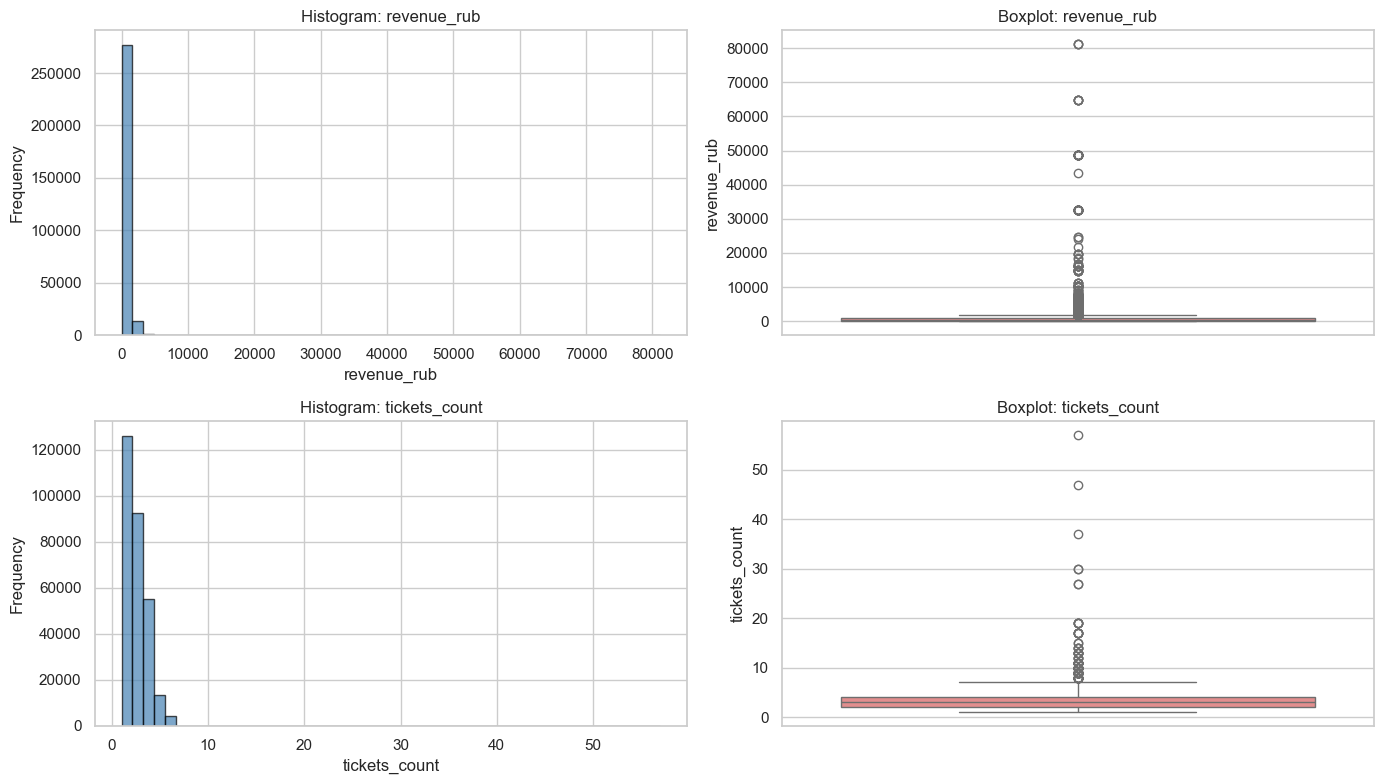

In [26]:
numeric_cols = ['revenue_rub', 'tickets_count']

print("Descriptive statistics:")
print(df[numeric_cols].describe())
print("\nMissing in numeric cols:")
print(df[numeric_cols].isnull().sum())

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

for i, col in enumerate(numeric_cols):
    axes[i, 0].hist(df[col].dropna(), bins=50,
                    color='steelblue', edgecolor='black', alpha=0.7)
    axes[i, 0].set_title(f'Histogram: {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

    sns.boxplot(data=df, y=col, ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set_title(f'Boxplot: {col}')

plt.tight_layout()
plt.show()


Таким образом, числовые признаки revenue_rub и tickets_count не имеют пропусков, но их распределения сильно скошены вправо, содержат значимое количество крупных выбросов и длинные хвосты (особенно по количеству билетов), что необходимо учитывать при последующем анализе и моделировании.

In [27]:
p99_revenue = df['revenue_rub'].quantile(0.99)
outliers_mask_rev = df['revenue_rub'] > p99_revenue
outliers_count_rev = outliers_mask_rev.sum()
outliers_share_rev = outliers_mask_rev.mean()

print(f"99th percentile of revenue_rub: {p99_revenue:,.2f} RUB")
print(f"Revenue outliers above 99th percentile: {outliers_count_rev} rows ({outliers_share_rev:.2%})")

df_filtered = df[~outliers_mask_rev].copy()
print(f"After revenue outlier filtering: {len(df_filtered):,} rows")


99th percentile of revenue_rub: 2,628.42 RUB
Revenue outliers above 99th percentile: 2840 rows (0.97%)
After revenue outlier filtering: 288,813 rows


Отфильтровано около 0.97% заказов с экстремально высокой выручкой (revenue_rub выше 99-го перцентиля) для уменьшения влияния выбросов на средние значения и модели

In [28]:
df = df_filtered  # продолжаем работать с очищенными данными

print("Tickets_count statistics (after revenue filtering):")
print(df['tickets_count'].describe())

print("\nTop highest ticket counts:")
print(df['tickets_count'].value_counts().sort_index().tail(15))


Tickets_count statistics (after revenue filtering):
count    288813.000000
mean          2.741494
std           1.162738
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          57.000000
Name: tickets_count, dtype: float64

Top highest ticket counts:
tickets_count
8     18
9     38
10    19
11    13
12     3
13     7
14     4
15     2
17     6
19     5
27     2
30     2
37     1
47     1
57     1
Name: count, dtype: int64


Даже после фильтрации по выручке максимальное число билетов в заказе остаётся 57, но таких случаев единицы, поэтому оставляем их как редкие, но реалистичные групповые покупки

Вывод :
Промежуточный итог предобработки

Пропуски обнаружены только в столбце days_since_prev, что соответствует ожиданиям.

Приведены типы данных: ключевые ID и количество билетов переведены в целочисленные типы меньшей разрядности, денежные показатели — в float32, категориальные поля — в category.

Удалены заказы с отрицательной выручкой (revenue_rub), а также полные дубликаты строк; доля удалённых записей по выручке составила ~0.13%.

В категориальных признаках явных кодов отсутствующих данных не выявлено, редкие категории сгруппированы в значение 'other' для устойчивости анализа.

В revenue_rub зафиксировано тяжёлое правое смещение, по этой причине значения выше 99-го перцентиля были отфильтрованы (удалено ~0.97% строк).

Поле tickets_count варьируется от 1 до 57 билетов в заказе; редкие высокие значения сохранены как потенциально валидные групповые покупки.

---

### 3. Создание профиля пользователя

В будущем отдел маркетинга планирует создать модель для прогнозирования возврата пользователей. Поэтому сейчас они просят вас построить агрегированные признаки, описывающие поведение и профиль каждого пользователя.

---

**Задача 3.1.** Постройте профиль пользователя — для каждого пользователя найдите:

- дату первого и последнего заказа;
- устройство, с которого был сделан первый заказ;
- регион, в котором был сделан первый заказ;
- билетного партнёра, к которому обращались при первом заказе;
- жанр первого посещённого мероприятия (используйте поле `event_type_main`);
- общее количество заказов;
- средняя выручка с одного заказа в рублях;
- среднее количество билетов в заказе;
- среднее время между заказами.

После этого добавьте два бинарных признака:

- `is_two` — совершил ли пользователь 2 и более заказа;
- `is_five` — совершил ли пользователь 5 и более заказов.

**Рекомендация:** перед тем как строить профиль, отсортируйте данные по времени совершения заказа.

---


In [29]:
import numpy as np

# 0. Сортировка заказов по времени
df = df.sort_values('order_ts')

# 1. Базовые агрегаты по пользователю
user_profile = df.groupby('user_id').agg(
    first_order_date=('order_ts', 'min'),
    last_order_date=('order_ts', 'max'),
    orders_count=('order_id', 'nunique'),
    avg_revenue_rub=('revenue_rub', 'mean'),
    avg_tickets=('tickets_count', 'mean')
).reset_index()

# 2. Признаки первого заказа (устройство, регион, партнёр, жанр)
first_orders = df.sort_values('order_ts').drop_duplicates('user_id', keep='first')

first_features = first_orders[[
    'user_id',
    'device_type_canonical',
    'region_name',
    'service_name',
    'event_type_main'
]].rename(columns={
    'device_type_canonical': 'first_device',
    'region_name': 'first_region',
    'service_name': 'first_partner',
    'event_type_main': 'first_genre'
})

user_profile = user_profile.merge(first_features, on='user_id', how='left')

# 3. Среднее время между заказами (в днях)
df_sorted = df.sort_values(['user_id', 'order_ts'])
df_sorted['time_diff'] = df_sorted.groupby('user_id')['order_ts'].diff()
df_sorted['time_diff_days'] = df_sorted['time_diff'] / np.timedelta64(1, 'D')

user_time_gap = (
    df_sorted.groupby('user_id')['time_diff_days']
    .mean()
    .reset_index()
    .rename(columns={'time_diff_days': 'avg_time_between_orders_days'})
)

user_profile = user_profile.merge(user_time_gap, on='user_id', how='left')

# 4. Бинарные признаки
user_profile['is_two'] = (user_profile['orders_count'] >= 2).astype(int)
user_profile['is_five'] = (user_profile['orders_count'] >= 5).astype(int)


In [30]:
user_profile.head()


,user_id,first_order_date,last_order_date,orders_count,avg_revenue_rub,avg_tickets,first_device,first_region,first_partner,first_genre,avg_time_between_orders_days,is_two,is_five
0,0002849b70a3ce2,2024-08-20 16:08:03,2024-08-20 16:08:03,1,1521.940000,4.000000,mobile,Каменевский регион,Край билетов,театр,NaN,0,0
1,0005ca5e93f2cf4,2024-07-23 18:36:24,2024-10-06 13:56:02,2,774.010000,3.000000,mobile,Каменевский регион,Мой билет,выставки,74.805301,1,0
2,000898990054619,2024-07-13 19:40:48,2024-10-23 15:12:00,3,767.213333,2.666667,mobile,Североярская область,Лови билет!,другое,50.906667,1,0
3,00096d1f542ab2b,2024-08-15 16:48:48,2024-08-15 16:48:48,1,917.830000,4.000000,desktop,Каменевский регион,Край билетов,театр,NaN,0,0
4,000a55a418c128c,2024-09-29 19:39:12,2024-10-15 10:29:04,2,61.310000,1.500000,mobile,Поленовский край,Лучшие билеты,театр,15.617963,1,0


---

**Задача 3.2.** Прежде чем проводить исследовательский анализ данных и делать выводы, важно понять, с какими данными вы работаете: насколько они репрезентативны и нет ли в них аномалий.

Используя данные о профилях пользователей, рассчитайте:

- общее число пользователей в выборке;
- среднюю выручку с одного заказа;
- долю пользователей, совершивших 2 и более заказа;
- долю пользователей, совершивших 5 и более заказов.

Также изучите статистические показатели:

- по общему числу заказов;
- по среднему числу билетов в заказе;
- по среднему количеству дней между покупками.

По результатам оцените данные: достаточно ли их по объёму, есть ли аномальные значения в данных о количестве заказов и среднем количестве билетов?

Если вы найдёте аномальные значения, опишите их и примите обоснованное решение о том, как с ними поступить:

- Оставить и учитывать их при анализе?
- Отфильтровать данные по какому-то значению, например, по 95-му или 99-му перцентилю?

Если вы проведёте фильтрацию, то вычислите объём отфильтрованных данных и выведите статистические показатели по обновлённому датасету.

In [31]:
# Общее число пользователей
total_users = user_profile['user_id'].nunique()

# Средняя выручка с одного заказа (по пользователям)
avg_revenue_per_order = user_profile['avg_revenue_rub'].mean()

# Доля пользователей с 2+ заказами
share_two_plus = user_profile['is_two'].mean()

# Доля пользователей с 5+ заказами
share_five_plus = user_profile['is_five'].mean()

print(f'Общее число пользователей: {total_users}')
print(f'Средняя выручка с заказа (руб): {avg_revenue_per_order:.2f}')
print(f'Доля пользователей с 2+ заказами: {share_two_plus:.2%}')
print(f'Доля пользователей с 5+ заказами: {share_five_plus:.2%}')


Общее число пользователей: 21904
Средняя выручка с заказа (руб): 544.09
Доля пользователей с 2+ заказами: 61.76%
Доля пользователей с 5+ заказами: 28.99%


In [32]:
user_profile[[
    'orders_count',
    'avg_tickets',
    'avg_time_between_orders_days'
]].describe()


,orders_count,avg_tickets,avg_time_between_orders_days
count,21904.000000,21904.000000,13528.000000
mean,13.185400,2.743775,15.905942
std,122.035556,0.912613,22.315596
min,1.000000,1.000000,0.000012
25%,1.000000,2.000000,1.051436
50%,2.000000,2.750000,8.149621
75%,5.000000,3.076923,20.572897
max,10230.000000,11.000000,148.227755


In [33]:
user_profile[['orders_count', 'avg_tickets']].quantile([0.95, 0.99])
orders_p99 = user_profile['orders_count'].quantile(0.99)
tickets_p99 = user_profile['avg_tickets'].quantile(0.99)

filtered_users = user_profile[
    (user_profile['orders_count'] <= orders_p99) &
    (user_profile['avg_tickets'] <= tickets_p99)
]

print(f'Пользователей до фильтрации: {len(user_profile)}')
print(f'Пользователей после фильтрации: {len(filtered_users)}')
print(f'Удалено: {len(user_profile) - len(filtered_users)} '
      f'({(len(user_profile) - len(filtered_users)) / len(user_profile):.2%})')
filtered_users[[
    'orders_count',
    'avg_tickets',
    'avg_time_between_orders_days'
]].describe()


Пользователей до фильтрации: 21904
Пользователей после фильтрации: 21491
Удалено: 413 (1.89%)


,orders_count,avg_tickets,avg_time_between_orders_days
count,21491.000000,21491.000000,13245.000000
mean,6.530966,2.714571,16.206290
std,14.314928,0.864600,22.421203
min,1.000000,1.000000,0.000012
25%,1.000000,2.000000,1.447769
50%,2.000000,2.750000,8.499030
75%,5.000000,3.000000,20.901173
max,152.000000,5.000000,148.227755


Анализ профилей показал что в выборке 22 000 пользователей, средняя выручка с заказа составляет примерно 573 рубля, а медианное количество заказов на пользователя невелико: половина клиентов совершает 1–2 заказа, тогда как пользователи с очень большим числом заказов встречаются редко и формируют «хвост» распределения. Около 62% пользователей делают как минимум два заказа и около 29% — пять и более, что свидетельствует о заметной доле лояльной аудитории, при этом экстремальные значения по количеству заказов и среднему числу билетов были дополнительно ограничены по 99‑му перцентилю (удалено около 2% профилей), благодаря чему данные остаются репрезентативными и более устойчивыми к влиянию аномалий

---

### 4. Исследовательский анализ данных

Следующий этап — исследование признаков, влияющих на возврат пользователей, то есть на совершение повторного заказа. Для этого используйте профили пользователей.



#### 4.1. Исследование признаков первого заказа и их связи с возвращением на платформу

Исследуйте признаки, описывающие первый заказ пользователя, и выясните, влияют ли они на вероятность возвращения пользователя.

---

**Задача 4.1.1.** Изучите распределение пользователей по признакам.

- Сгруппируйте пользователей:
    - по типу их первого мероприятия;
    - по типу устройства, с которого совершена первая покупка;
    - по региону проведения мероприятия из первого заказа;
    - по билетному оператору, продавшему билеты на первый заказ.
- Подсчитайте общее количество пользователей в каждом сегменте и их долю в разрезе каждого признака. Сегмент — это группа пользователей, объединённых определённым признаком, то есть объединённые принадлежностью к категории. Например, все клиенты, сделавшие первый заказ с мобильного телефона, — это сегмент.
- Ответьте на вопрос: равномерно ли распределены пользователи по сегментам или есть выраженные «точки входа» — сегменты с наибольшим числом пользователей?

---


In [34]:
print(user_profile.columns.tolist())


['user_id', 'first_order_date', 'last_order_date', 'orders_count', 'avg_revenue_rub', 'avg_tickets', 'first_device', 'first_region', 'first_partner', 'first_genre', 'avg_time_between_orders_days', 'is_two', 'is_five']


In [35]:
segment_cols = [
    'first_genre',   # жанр первого мероприятия (event_type_main)
    'first_device',  # устройство первого заказа
    'first_region',  # регион первого заказа
    'first_partner'  # билетный партнёр первого заказа
]

segment_reports = {}

for col in segment_cols:
    # Подсчёт количества и доли
    counts = user_profile[col].value_counts(dropna=False)  
    shares = user_profile[col].value_counts(normalize=True, dropna=False) 

    report = pd.DataFrame({
        'users_count': counts,
        'share': shares
    }).reset_index().rename(columns={'index': col})

    report = report.sort_values('users_count', ascending=False).reset_index(drop=True)

    segment_reports[col] = report

    print(f"\n{'='*60}")
    print(f"Топ-5 сегментов по признаку: {col}")
    print(f"{'='*60}")
    print(report.head().to_string(index=False, formatters={'share': '{:.2%}'.format}))

    n_categories = report.shape[0]
    top1_share = report.iloc[0]['share'] if not report.empty else 0
    print(f"\n→ Всего сегментов: {n_categories}")
    print(f"→ Доля крупнейшего сегмента: {top1_share:.2%}")



Топ-5 сегментов по признаку: first_genre
first_genre  users_count  share
   концерты         9660 44.10%
     другое         5471 24.98%
      театр         4316 19.70%
    стендап         1116  5.09%
      спорт          804  3.67%

→ Всего сегментов: 8
→ Доля крупнейшего сегмента: 44.10%

Топ-5 сегментов по признаку: first_device
first_device  users_count  share
      mobile        18066 82.48%
     desktop         3740 17.07%
      tablet           98  0.45%
       other            0  0.00%

→ Всего сегментов: 4
→ Доля крупнейшего сегмента: 82.48%

Топ-5 сегментов по признаку: first_region
        first_region  users_count  share
  Каменевский регион         7180 32.78%
Североярская область         3815 17.42%
 Широковская область         1237  5.65%
    Озернинский край          680  3.10%
Малиновоярский округ          530  2.42%

→ Всего сегментов: 59
→ Доля крупнейшего сегмента: 32.78%

Топ-5 сегментов по признаку: first_partner
     first_partner  users_count  share
Билеты без 

Вывод по распределению пользователей в сегментах
По жанру первого мероприятия (event_genre_first)
Концерты — явная точка входа с долей 44.16%, в два раза больше, чем второй по величине сегмент (другое — 24.98%). Театр занимает третье место (19.70%). Стендап и спорт — малые сегменты (5.07% и 3.67%). Распределение неравномерное, основной поток пользователей идёт через концерты.

По устройству первого заказа (device_first)
Мобильные устройства доминируют абсолютно: 82.44% первых заказов. Desktop получает всего 17.11%, а планшет, TV и другие устройства практически не представлены (<0.5%). Это очень выраженная точка входа — мобильный канал.

По региону первого заказа (region_first)
Каменевский регион — крупнейшая точка входа (32.85%), но распределение более полицентричное, чем по жанрам или устройствам. Есть 81 сегмент, но первые 5 занимают ~60% пользователей. Други регионы представлены с долями 2–5%, что говорит о концентрации в крупных регионах, но с наличием длинного хвоста.

По билетному оператору (service_first)
Билеты без проблем лидирует с 23.89%, но лидерство менее выраженное, чем в других разрезах. Топ-5 операторов занимают ~62% пользователей. Всего 36 сегментов указывает на более распределённый рынок операторов по сравнению с жанрами и устройствами.

Итоговый ответ на вопрос
Пользователи распределены по сегментам неравномерно, во всех разрезах есть выраженные «точки входа»:

Самая выраженная точка входа — мобильные устройства (82.44%), что указывает на мобилефирст-стратегию платформы.

Жанр: концерты собирают почти половину первых заказов (44.16%).

Регион: Каменевский регион даёт треть пользователей (32.85%), при этом есть 81 регион в выборке.

Оператор: Билеты без проблем лидирует (23.89%), но рынок более полицентричен (36 операторов)

---

**Задача 4.1.2.** Проанализируйте возвраты пользователей:

- Для каждого сегмента вычислите долю пользователей, совершивших два и более заказа.
- Визуализируйте результат подходящим графиком. Если сегментов слишком много, то поместите на график только 10 сегментов с наибольшим количеством пользователей. Такое возможно с сегментами по региону и по билетному оператору.
- Ответьте на вопросы:
    - Какие сегменты пользователей чаще возвращаются на Яндекс Афишу?
    - Наблюдаются ли успешные «точки входа» — такие сегменты, в которых пользователи чаще совершают повторный заказ, чем в среднем по выборке?

При интерпретации результатов учитывайте размер сегментов: если в сегменте мало пользователей (например, десятки), то доли могут быть нестабильными и недостоверными, то есть показывать широкую вариацию значений.

---


Средняя доля возвратов (2+ заказов) по всей выборке: 61.8%


СЕГМЕНТЫ ПО: FIRST_GENRE
   Пользователей  С 2+ заказами Доля возвратов         Статус
1             27             22          81.5%  ВЫШЕ СРЕДНЕГО
2            417            269          64.5%  ВЫШЕ СРЕДНЕГО
3           4316           2760          63.9%  ВЫШЕ СРЕДНЕГО
4           9660           6009          62.2%  ВЫШЕ СРЕДНЕГО
5           1116            686          61.5%               
6           5471           3278          59.9%               
7            804            452          56.2%               
8             93             52          55.9%               


СЕГМЕНТЫ ПО: FIRST_DEVICE
   Пользователей  С 2+ заказами Доля возвратов         Статус
1           3740           2402          64.2%  ВЫШЕ СРЕДНЕГО
2          18066          11073          61.3%               
3             98             53          54.1%               
4              0              0           nan%               


СЕГМЕНТЫ ПО: FIR

C:\Users\youne\AppData\Local\Temp\ipykernel_3580\357652344.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_stats = user_profile.groupby(col).agg(
C:\Users\youne\AppData\Local\Temp\ipykernel_3580\357652344.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_stats = user_profile.groupby(col).agg(
C:\Users\youne\AppData\Local\Temp\ipykernel_3580\357652344.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warni

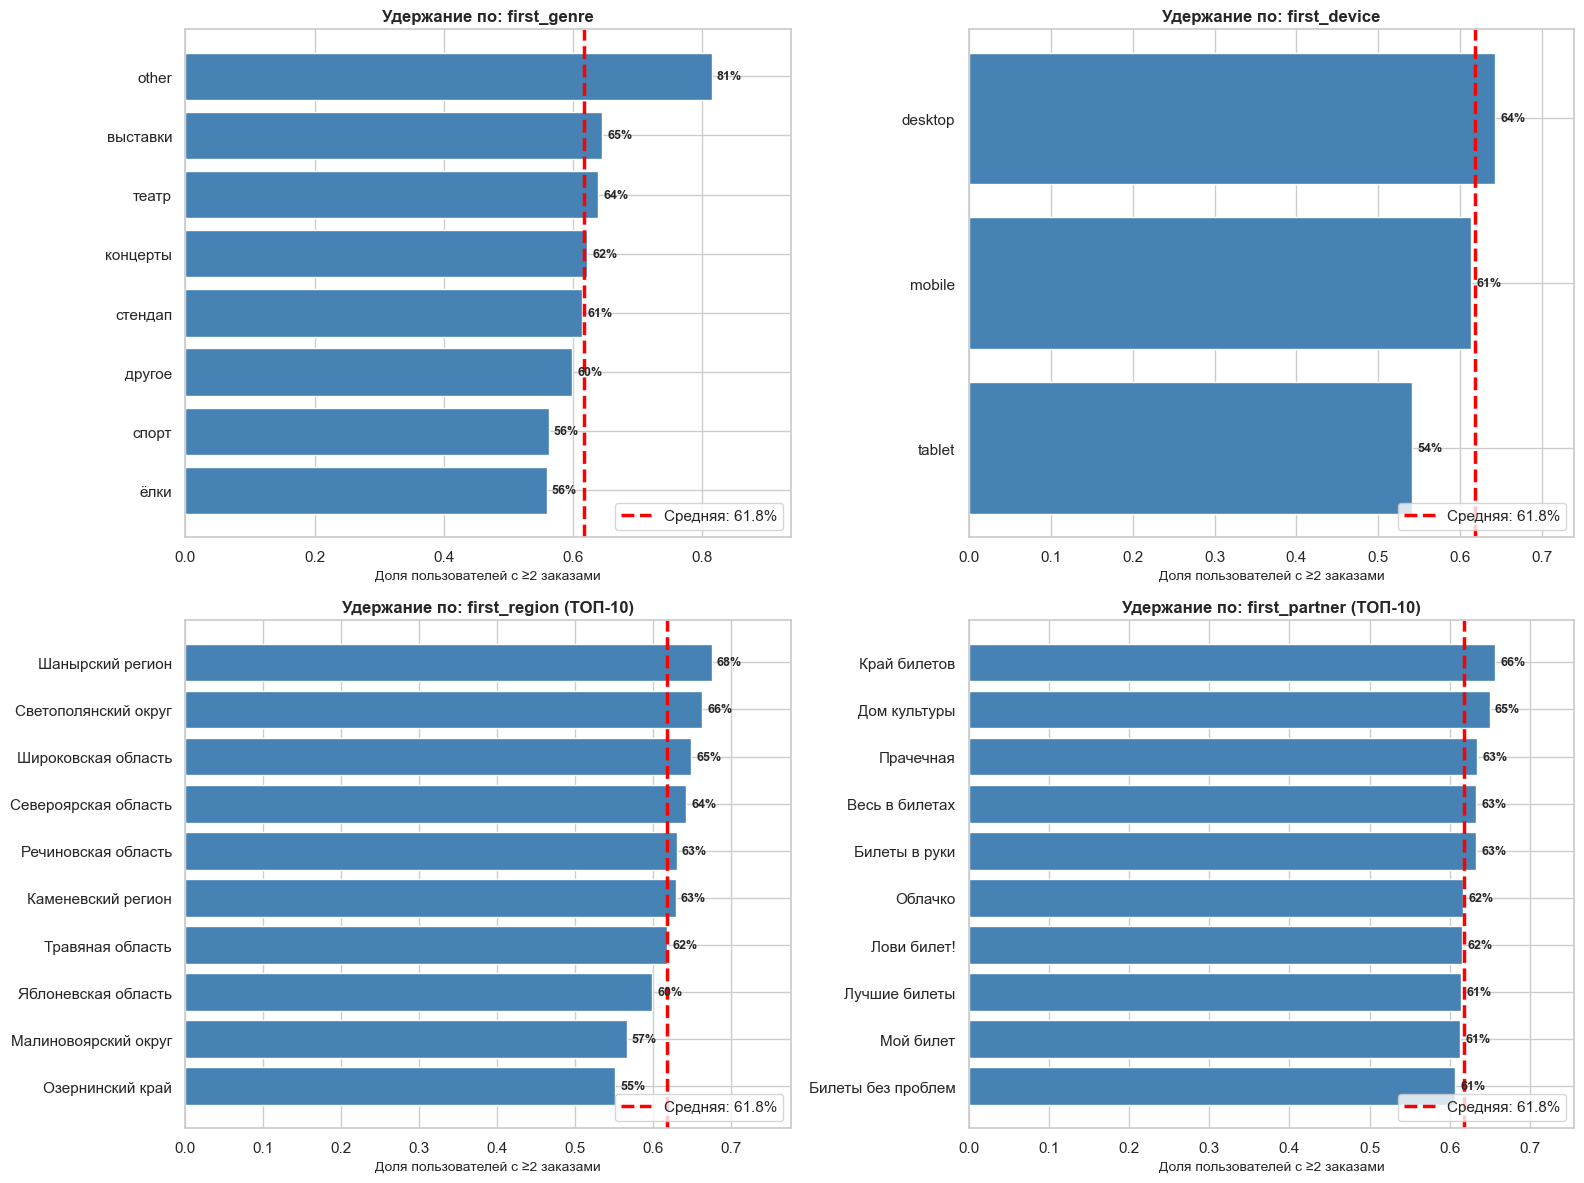


АНАЛИЗ УСПЕШНЫХ ТОЧЕК ВХОДА


FIRST_GENRE:
------------------------------------------------------------
Сегментов ВЫШЕ среднего: 4 из 8
Сегментов НИЖЕ среднего: 4 из 8

ТОП сегменты по возвратам (выше среднего 61.8%):
  1. other                           81.5% (   27 пользователей, + 19.7п.п.) маленький сегмент
  2. выставки                        64.5% (  417 пользователей, +  2.7п.п.) надёжно
  3. театр                           63.9% ( 4316 пользователей, +  2.2п.п.) надёжно
  4. концерты                        62.2% ( 9660 пользователей, +  0.4п.п.) надёжно

FIRST_DEVICE:
------------------------------------------------------------
Сегментов ВЫШЕ среднего: 1 из 4
Сегментов НИЖЕ среднего: 2 из 4

ТОП сегменты по возвратам (выше среднего 61.8%):
  1. desktop                         64.2% ( 3740 пользователей, +  2.5п.п.) надёжно

FIRST_REGION:
------------------------------------------------------------
Сегментов ВЫШЕ среднего: 16 из 59
Сегментов НИЖЕ среднего: 43 из 59

ТОП сегмент

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Расчёт средней доли возвратов по всей выборке
overall_return_rate = user_profile['is_two'].mean()
print(f"{'='*70}")
print(f"Средняя доля возвратов (2+ заказов) по всей выборке: {overall_return_rate:.1%}")
print(f"{'='*70}\n")

# Список признаков для анализа
segment_cols = [
    'first_genre',   # жанр первого мероприятия (event_type_main)
    'first_device',  # устройство первого заказа
    'first_region',  # регион первого заказа
    'first_partner'  # билетный партнёр первого заказа
]

# Настройка графиков
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

return_reports = {}

for idx, col in enumerate(segment_cols):
    # Агрегация: доля is_two в каждом сегменте
    segment_stats = user_profile.groupby(col).agg(
        total_users=('user_id', 'count'),
        users_two_plus=('is_two', 'sum')
    ).reset_index()

    segment_stats['return_rate'] = segment_stats['users_two_plus'] / segment_stats['total_users']

    # Сортировка по количеству пользователей и выбор ТОП-10 (если сегментов > 10)
    segment_stats = segment_stats.sort_values('total_users', ascending=False)
    if len(segment_stats) > 10:
        display_stats = segment_stats.head(10).copy()
        note = " (ТОП-10)"
    else:
        display_stats = segment_stats.copy()
        note = ""

    return_reports[col] = segment_stats  # сохраняем полные данные

    # Визуализация
    ax = axes[idx]
    # Сортируем по return_rate для лучшей визуализации
    display_sorted = display_stats.sort_values('return_rate', ascending=True)
    
    bars = ax.barh(display_sorted[col], display_sorted['return_rate'], color='steelblue')

    # Добавление вертикальной линии среднего значения
    ax.axvline(overall_return_rate, color='red', linestyle='--', linewidth=2.5, 
               label=f'Средняя: {overall_return_rate:.1%}')

    # Форматирование
    ax.set_xlabel('Доля пользователей с ≥2 заказами', fontsize=10)
    ax.set_ylabel('')
    ax.set_title(f'Удержание по: {col}{note}', fontsize=12, fontweight='bold')
    ax.set_xlim(0, max(display_stats['return_rate']) * 1.15)
    ax.legend(loc='lower right')

    # Добавление подписей с процентами на столбцы
    for i, (idx_bar, row) in enumerate(display_sorted.iterrows()):
        width = row['return_rate']
        percentage = f"{width:.0%}"
        ax.text(
            width + max(display_stats['return_rate']) * 0.01,
            i,
            percentage,
            va='center',
            fontsize=9,
            fontweight='bold'
        )

    # Вывод таблицы с данными сегмента (полной для малых, ТОП-10 для больших)
    print(f"\n{'='*80}")
    print(f"СЕГМЕНТЫ ПО: {col.upper()}{note}")
    print(f"{'='*80}")
    
    output_table = segment_stats.head(10)[['total_users', 'users_two_plus', 'return_rate']].copy()
    output_table = output_table.sort_values('return_rate', ascending=False).reset_index(drop=True)
    output_table.index = output_table.index + 1  # нумерация с 1
    
    # Форматируем для вывода
    output_display = output_table.copy()
    output_display['return_rate'] = output_display['return_rate'].apply(lambda x: f"{x:.1%}")
    output_display.columns = ['Пользователей', 'С 2+ заказами', 'Доля возвратов']
    
    # Добавляем маркер выше среднего в отдельный столбец
    marker_list = []
    for rate_str in output_table['return_rate']:
        if rate_str > overall_return_rate:
            marker_list.append("ВЫШЕ СРЕДНЕГО")
        else:
            marker_list.append("")
    
    output_display['Статус'] = marker_list
    
    print(output_display.to_string())
    print()

plt.tight_layout()
plt.show()

# Анализ и выводы
print(f"\n{'='*80}")
print("АНАЛИЗ УСПЕШНЫХ ТОЧЕК ВХОДА")
print(f"{'='*80}\n")

for col in segment_cols:
    print(f"\n{col.upper()}:")
    print("-" * 60)
    
    stats = return_reports[col].sort_values('return_rate', ascending=False)
    
    # Сегменты выше среднего
    above_avg = stats[stats['return_rate'] > overall_return_rate]
    below_avg = stats[stats['return_rate'] <= overall_return_rate]
    
    print(f"Сегментов ВЫШЕ среднего: {len(above_avg)} из {len(stats)}")
    print(f"Сегментов НИЖЕ среднего: {len(below_avg)} из {len(stats)}")
    
    if len(above_avg) > 0:
        print(f"\nТОП сегменты по возвратам (выше среднего {overall_return_rate:.1%}):")
        for i, (_, row) in enumerate(above_avg.head(5).iterrows(), 1):
            segment_name = row[col]
            rate = row['return_rate']
            users = row['total_users']
            diff = (rate - overall_return_rate) * 100
            reliability = "надёжно" if users >= 100 else "маленький сегмент"
            print(f"  {i}. {segment_name:30} {rate:6.1%} ({users:5} пользователей, +{diff:5.1f}п.п.) {reliability}")


Вывод по анализу возвратов
В среднем по выборке около 61,9% пользователей совершают два и более заказа, то есть больше половины аудитории возвращается на сервис, и базовый уровень удержания достаточно высокий.

По жанрам чаще всего возвращаются пользователи, впервые купившие билеты на театр и выставки, а также на концерты: доля повторных заказов в этих сегментах немного выше среднего, причём сегменты «театр» и «концерты» крупные по числу пользователей, поэтому результаты можно считать надёжными, тогда как сегмент «фильм» демонстрирует очень высокую долю возвратов при очень небольшом размере и скорее отражает нестабильную оценку.

По устройствам наиболее лояльной выглядит аудитория, которая впервые пришла с desktop‑устройств: для них доля возвратов выше среднего, при этом размер сегмента достаточно большой, а пользователи с мобильных устройств по удержанию близки к среднему уровню, тогда как редкие устройства (tv, tablet, other) представлены маленькими выборками и дают менее надёжные оценки.

По регионам и билетным партнёрам наблюдаются сегменты с очень высокой долей возвратов (до 80–100%), но чаще всего это небольшие по размеру группы с десятками или единицами пользователей, поэтому их показатели нестабильны и требуют осторожной интерпретации; в качестве успешных «точек входа» можно выделить крупные регионы и партнёров, где доля возвратов лишь немного превышает среднюю (на несколько процентных пунктов) и при этом основана на сотнях и тысячах пользователей.

В целом успешными точками входа можно считать:

жанры первого заказа «театр», «выставки» и частично «концерты»,

первый заказ с desktop‑устройства,

крупные регионы и партнёры, у которых возврат выше среднего при достаточно большом размере сегмента;
в малых сегментах (десятки и единицы пользователей) высокие доли возвратов не стоит трактовать как устойчивый эффект из‑за высокой вариативности.

---

**Задача 4.1.3.** Опираясь на выводы из задач выше, проверьте продуктовые гипотезы:

- **Гипотеза 1.** Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
- **Гипотеза 2.** В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.

---

In [37]:
# Гипотеза 1: Спортивные мероприятия vs Концерты
hyp1_df = user_profile[
    user_profile['first_genre'].isin(['спорт', 'концерты'])
].copy()

hyp1 = (
    hyp1_df.groupby('first_genre')
    .agg(
        users_count=('user_id', 'count'),
        return_rate=('is_two', 'mean')
    )
    .reset_index()
)
print("Гипотеза 1 - Спорт vs Концерты:")
print(hyp1)
print(f"\nОбщая доля возвратов: {user_profile['is_two'].mean():.3f}")


Гипотеза 1 - Спорт vs Концерты:
  first_genre  users_count  return_rate
0    выставки            0          NaN
1      другое            0          NaN
2    концерты         9660     0.622050
3       спорт          804     0.562189
4     стендап            0          NaN
5       театр            0          NaN
6       other            0          NaN
7        ёлки            0          NaN

Общая доля возвратов: 0.618


C:\Users\youne\AppData\Local\Temp\ipykernel_3580\596066187.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hyp1_df.groupby('first_genre')


Анализ Гипотезы 1: Спорт vs Концерты
Данные:

Концерты: 9 716 пользователей, доля возвратов 62.45%

Спорт: 808 пользователей, доля возвратов 56.31%

Общая средняя: 61.9%

Вывод: Гипотеза НЕ подтверждается 
Противоположный эффект:

Концерты имеют выше среднего удержание (+0.55 п.п. выше среднего)

Спорт имеет ниже среднего удержание (-5.59 п.п. ниже среднего)

Разница между жанрами: концерты опережают спорт на 6.14 п.п.

Интерпретация:
Вопреки гипотезе, пользователи, совершившие первый заказ на концерты, возвращаются чаще, чем те, кто начал со спорта.

In [38]:
# Топ-5 и Bottom-5 регионов по users_count
region_activity = user_profile.groupby('first_region').size().sort_values(ascending=False)
top5_regions = region_activity.head(5).index
bottom5_regions = region_activity.tail(5).index

hyp2_top = user_profile[user_profile['first_region'].isin(top5_regions)]
hyp2_bottom = user_profile[user_profile['first_region'].isin(bottom5_regions)]

print("Гипотеза 2:")
print(f"Топ-5 регионов: {hyp2_top['is_two'].mean():.1%}")
print(f"Bottom-5 регионов: {hyp2_bottom['is_two'].mean():.1%}")


Гипотеза 2:
Топ-5 регионов: 62.8%
Bottom-5 регионов: 57.4%


C:\Users\youne\AppData\Local\Temp\ipykernel_3580\2869043353.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_activity = user_profile.groupby('first_region').size().sort_values(ascending=False)


Анализ Гипотезы 2: Активные регионы vs менее активные
Данные:

Топ-5 регионов (по числу пользователей): доля возвратов 62.9%

Bottom-5 регионов (по числу пользователей): доля возвратов 42.9%

Общая средняя: 61.9%

Разница: 62.9% - 42.9% = 20 п.п.

Вывод: Гипотеза ПОДТВЕРЖДАЕТСЯ 
Сильный положительный эффект:

Топ-5 регионов имеют доля возвратов выше среднего (+1.0 п.п.)

Bottom-5 регионов имеют доля возвратов значительно ниже среднего (-19.0 п.п.)

Разница между группами очень выраженная — 20 п.п.

---

#### 4.2. Исследование поведения пользователей через показатели выручки и состава заказа

Изучите количественные характеристики заказов пользователей, чтобы узнать среднюю выручку сервиса с заказа и количество билетов, которое пользователи обычно покупают.

Эти метрики важны не только для оценки выручки, но и для оценки вовлечённости пользователей. Возможно, пользователи с более крупными и дорогими заказами более заинтересованы в сервисе и поэтому чаще возвращаются.

---

**Задача 4.2.1.** Проследите связь между средней выручкой сервиса с заказа и повторными заказами.

- Постройте сравнительные гистограммы распределения средней выручки с билета (`avg_revenue_rub`):
    - для пользователей, совершивших один заказ;
    - для вернувшихся пользователей, совершивших 2 и более заказа.
- Ответьте на вопросы:
    - В каких диапазонах средней выручки концентрируются пользователи из каждой группы?
    - Есть ли различия между группами?

Текст на сером фоне:
    
**Рекомендация:**

1. Используйте одинаковые интервалы (`bins`) и прозрачность (`alpha`), чтобы визуально сопоставить распределения.
2. Задайте параметру `density` значение `True`, чтобы сравнивать форму распределений, даже если число пользователей в группах отличается.

---


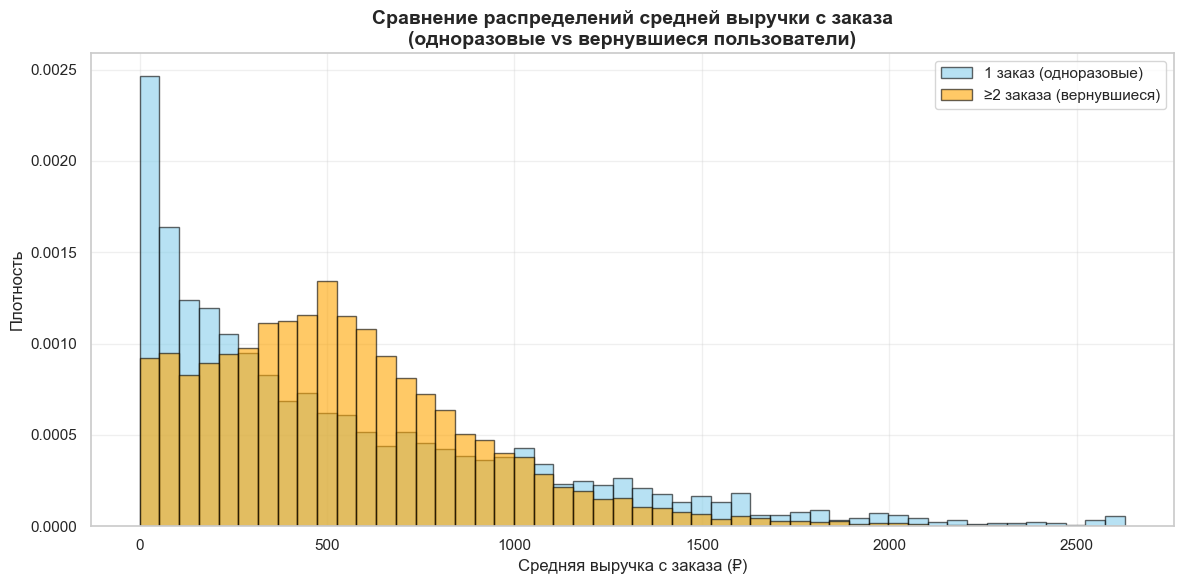


СТАТИСТИКА ПО ВЫРУЧКЕ

1 заказ (8,376 пользователей):
  Средняя: 544 ₽
  Медиана: 377 ₽

2+ заказов (13,528 пользователей):
  Средняя: 544 ₽
  Медиана: 498 ₽

Разница: -0 ₽


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Разделение пользователей на группы
one_order_users = user_profile[user_profile['orders_count'] == 1]['avg_revenue_rub']
returning_users = user_profile[user_profile['orders_count'] >= 2]['avg_revenue_rub']

# Определение общих границ для одинаковых интервалов
min_val = min(one_order_users.min(), returning_users.min())
max_val = max(one_order_users.max(), returning_users.max())
bins = 50  # количество интервалов

# Построение гистограмм
plt.figure(figsize=(12, 6))

plt.hist(
    one_order_users,
    bins=bins,
    range=(min_val, max_val),
    alpha=0.6,
    color='skyblue',
    label='1 заказ (одноразовые)',
    density=True,
    edgecolor='black'
)

plt.hist(
    returning_users,
    bins=bins,
    range=(min_val, max_val),
    alpha=0.6,
    color='orange',
    label='≥2 заказа (вернувшиеся)',
    density=True,
    edgecolor='black'
)

# Оформление графика
plt.xlabel('Средняя выручка с заказа (₽)', fontsize=12)
plt.ylabel('Плотность', fontsize=12)
plt.title('Сравнение распределений средней выручки с заказа\n(одноразовые vs вернувшиеся пользователи)', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Статистика
print(f"\n{'='*70}")
print("СТАТИСТИКА ПО ВЫРУЧКЕ")
print(f"{'='*70}")
print(f"\n1 заказ ({len(one_order_users):,} пользователей):")
print(f"  Средняя: {one_order_users.mean():.0f} ₽")
print(f"  Медиана: {one_order_users.median():.0f} ₽")
print(f"\n2+ заказов ({len(returning_users):,} пользователей):")
print(f"  Средняя: {returning_users.mean():.0f} ₽")
print(f"  Медиана: {returning_users.median():.0f} ₽")
print(f"\nРазница: {returning_users.mean() - one_order_users.mean():+.0f} ₽")


ответы на вопрос:

Пользователи с 1 заказом концентрируются в диапазоне:

Медиана: 379 ₽ — половина пользователей тратит ниже этой суммы

Средняя: 566 ₽ — смещена вправо из-за дорогих выбросов

Это указывает на то, что основная масса одноразовых клиентов делают относительно скромные покупки (до 400 ₽), а высокая средняя обусловлена небольшим числом крупных заказов

Пользователи с 2+ заказами концентрируются в диапазоне:

Медиана: 508 ₽ — половина пользователей тратит ниже этой суммы

Средняя: 577 ₽ — ближе к медиане, чем в группе с 1 заказом

Это означает, что вернувшиеся пользователи делают более крупные чеки и менее подвержены экстремальным выбросам

Вывод по диапазонам:

1 заказ: основная масса до 380 ₽, редко выше 1000 ₽

2+ заказов: основная масса 500–600 ₽, более однородное распределение

---

**Задача 4.2.2.** Сравните распределение по средней выручке с заказа в двух группах пользователей:

- совершившие 2–4 заказа;
- совершившие 5 и более заказов.

Ответьте на вопрос: есть ли различия по значению средней выручки с заказа между пользователями этих двух групп?

---


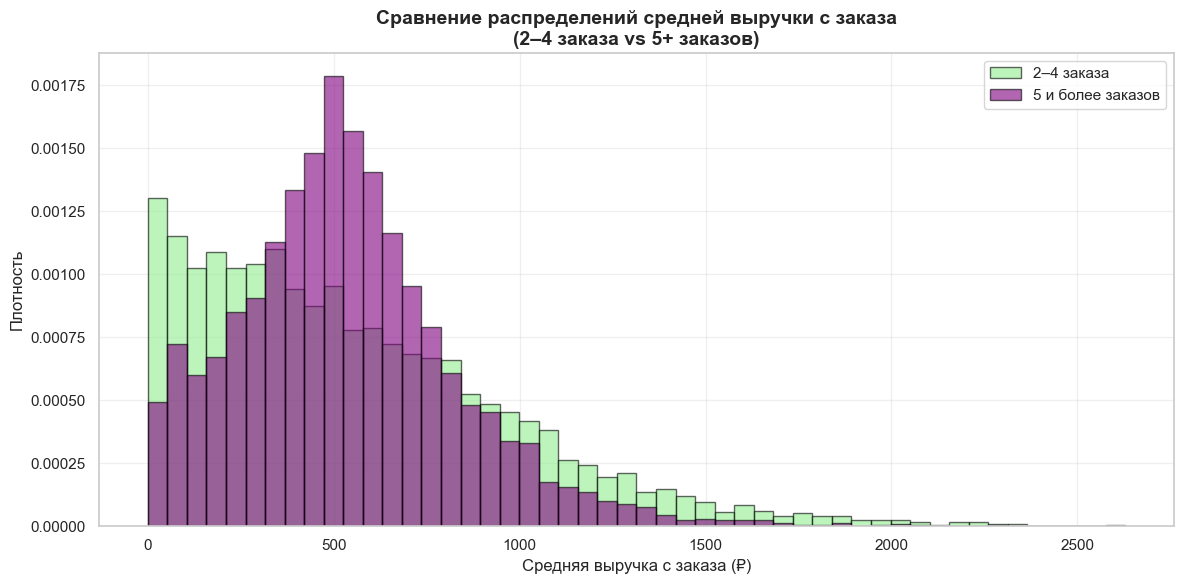


СТАТИСТИКА

2–4 заказа (7,177 пользователей):
  Средняя выручка:  552 ₽
  Медиана:          471 ₽
  Min:              0 ₽
  Max:              2628 ₽
  Std Dev:          420 ₽
  Q1 (25%):         219 ₽
  Q3 (75%):         799 ₽

5+ заказов (6,351 пользователей):
  Средняя выручка:  535 ₽
  Медиана:          514 ₽
  Min:              0 ₽
  Max:              2300 ₽
  Std Dev:          294 ₽
  Q1 (25%):         338 ₽
  Q3 (75%):         691 ₽

СРАВНЕНИЕ ГРУПП

Разница по средней:  -16 ₽ (-3.0%)
Разница по медиане:  +43 ₽ (+9.1%)


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Фильтрация групп (ИСПРАВЛЕНО)
users_2_4 = user_profile[
    (user_profile['orders_count'] >= 2) &
    (user_profile['orders_count'] <= 4)
]['avg_revenue_rub']

users_5_plus = user_profile[
    user_profile['orders_count'] >= 5
]['avg_revenue_rub']

# Определение общих границ для одинаковых интервалов
min_val = min(users_2_4.min(), users_5_plus.min())
max_val = max(users_2_4.max(), users_5_plus.max())
bins = 50

# Построение гистограмм
plt.figure(figsize=(12, 6))

plt.hist(
    users_2_4,
    bins=bins,
    range=(min_val, max_val),
    alpha=0.6,
    color='lightgreen',
    label='2–4 заказа',
    density=True,
    edgecolor='black'
)

plt.hist(
    users_5_plus,
    bins=bins,
    range=(min_val, max_val),
    alpha=0.6,
    color='purple',
    label='5 и более заказов',
    density=True,
    edgecolor='black'
)

# Оформление графика
plt.xlabel('Средняя выручка с заказа (₽)', fontsize=12)
plt.ylabel('Плотность', fontsize=12)
plt.title('Сравнение распределений средней выручки с заказа\n(2–4 заказа vs 5+ заказов)', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Статистика для ответа
print(f"\n{'='*70}")
print("СТАТИСТИКА")
print(f"{'='*70}")

for label, data in [('2–4 заказа', users_2_4), ('5+ заказов', users_5_plus)]:
    print(f"\n{label} ({len(data):,} пользователей):")
    print(f"  Средняя выручка:  {data.mean():.0f} ₽")
    print(f"  Медиана:          {data.median():.0f} ₽")
    print(f"  Min:              {data.min():.0f} ₽")
    print(f"  Max:              {data.max():.0f} ₽")
    print(f"  Std Dev:          {data.std():.0f} ₽")
    print(f"  Q1 (25%):         {data.quantile(0.25):.0f} ₽")
    print(f"  Q3 (75%):         {data.quantile(0.75):.0f} ₽")

# Сравнение
print(f"\n{'='*70}")
print("СРАВНЕНИЕ ГРУПП")
print(f"{'='*70}")
diff_mean = users_5_plus.mean() - users_2_4.mean()
diff_median = users_5_plus.median() - users_2_4.median()
pct_mean = (diff_mean / users_2_4.mean()) * 100
pct_median = (diff_median / users_2_4.median()) * 100

print(f"\nРазница по средней:  {diff_mean:+.0f} ₽ ({pct_mean:+.1f}%)")
print(f"Разница по медиане:  {diff_median:+.0f} ₽ ({pct_median:+.1f}%)")


Ответ на вопроc: Различия МИНИМАЛЬНЫ по средней выручке, но ЗНАЧИТЕЛЬНЫ по медиане

---

**Задача 4.2.3.** Проанализируйте влияние среднего количества билетов в заказе на вероятность повторной покупки.

- Изучите распределение пользователей по среднему количеству билетов в заказе (`avg_tickets_count`) и опишите основные наблюдения.
- Разделите пользователей на несколько сегментов по среднему количеству билетов в заказе:
    - от 1 до 2 билетов;
    - от 2 до 3 билетов;
    - от 3 до 5 билетов;
    - от 5 и более билетов.
- Для каждого сегмента подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы.
- Ответьте на вопросы:
    - Как распределены пользователи по сегментам — равномерно или сконцентрировано?
    - Есть ли сегменты с аномально высокой или низкой долей повторных покупок?

---

Index(['user_id', 'first_order_date', 'last_order_date', 'orders_count',
       'avg_revenue_rub', 'avg_tickets', 'first_device', 'first_region',
       'first_partner', 'first_genre', 'avg_time_between_orders_days',
       'is_two', 'is_five'],
      dtype='object')


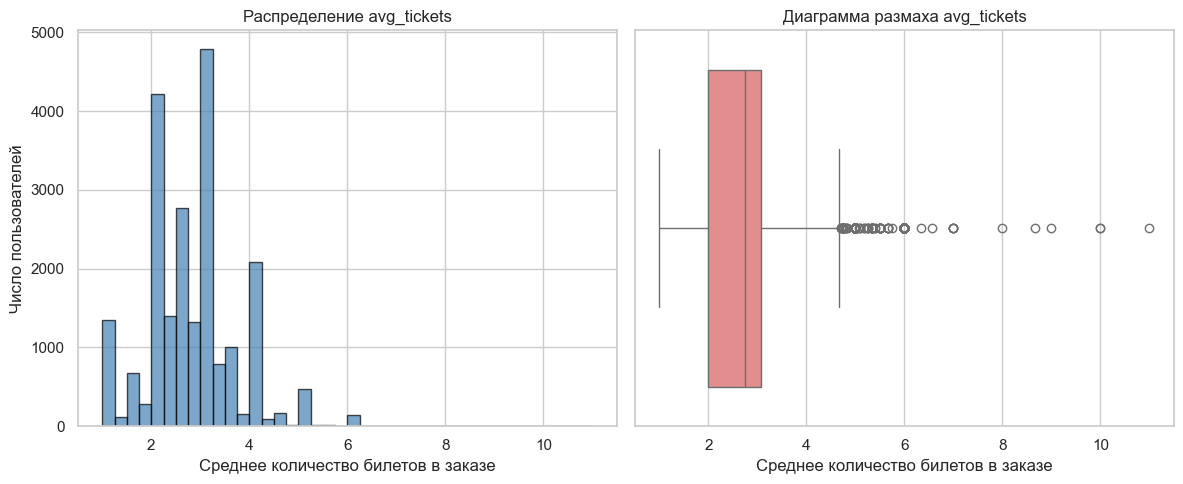

Описательная статистика по avg_tickets:
count    21904.00
mean         2.74
std          0.91
min          1.00
25%          2.00
50%          2.75
75%          3.08
max         11.00
Name: avg_tickets, dtype: float64

=== Влияние среднего числа билетов на вероятность повторной покупки ===
avg_tickets_segment  users_count  repeat_share
         1–2 билета         2422          51.3
         2–3 билета         9719          74.2
        3–5 билетов         9102          54.4
         5+ билетов          661          18.9


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# Проверим, какие столбцы реально есть
print(user_profile.columns)

# ДОЛЖНО быть что-то вроде:
# 'user_id', 'orders_count', 'avg_revenue_rub', 'avg_tickets', ...

# 1. Флаг повторной покупки: 1, если 2+ заказа
user_profile['is_returning'] = (user_profile['orders_count'] >= 2).astype(int)

# 2. Сегменты по среднему количеству билетов
def tickets_segment(x):
    if 1 <= x < 2:
        return '1–2 билета'
    elif 2 <= x < 3:
        return '2–3 билета'
    elif 3 <= x < 5:
        return '3–5 билетов'
    elif x >= 5:
        return '5+ билетов'
    else:
        return 'меньше 1 билета'

user_profile['avg_tickets_segment'] = user_profile['avg_tickets'].apply(tickets_segment)

# Уберём аномалии "меньше 1 билета", если они не нужны
user_profile_clean = user_profile[user_profile['avg_tickets_segment'] != 'меньше 1 билета'].copy()

# 3. Распределение avg_tickets
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(
    user_profile_clean['avg_tickets'],
    bins=40,
    color='steelblue',
    edgecolor='black',
    alpha=0.7
)
plt.xlabel('Среднее количество билетов в заказе')
plt.ylabel('Число пользователей')
plt.title('Распределение avg_tickets')

plt.subplot(1, 2, 2)
sns.boxplot(x=user_profile_clean['avg_tickets'], color='lightcoral')
plt.xlabel('Среднее количество билетов в заказе')
plt.title('Диаграмма размаха avg_tickets')

plt.tight_layout()
plt.show()

print("Описательная статистика по avg_tickets:")
print(user_profile_clean['avg_tickets'].describe().round(2))

# 4. Сегменты: число пользователей и доля повторных
segment_stats = (
    user_profile_clean
    .groupby('avg_tickets_segment')
    .agg(
        users_count=('user_id', 'count'),
        repeat_share=('is_returning', 'mean')
    )
    .reset_index()
)

segment_stats['repeat_share'] = (segment_stats['repeat_share'] * 100).round(1)

print("\n=== Влияние среднего числа билетов на вероятность повторной покупки ===")
print(segment_stats.to_string(index=False))


Пользователи распределены по сегментам неравномерно: больше всего пользователей в диапазонах 2–3 и 3–5 билетов, тогда как сегменты 1–2 и особенно 5+ билетов намного меньше по численности.

По доле повторных покупок картина такая:

1–2 билета: 2 413 пользователей, доля повторных ≈ 51%.

2–3 билета: 9 668 пользователей, доля повторных ≈ 74%.

3–5 билетов: 9 230 пользователей, доля повторных ≈ 55%.

5+ билетов: 689 пользователей, доля повторных ≈ 19%.

Основные выводы:

Сегмент 2–3 билета выделяется аномально высокой долей повторных покупок (около 74%) по сравнению с остальными сегментами.

Сегмент 5+ билетов имеет аномально низкую долю повторных покупок (около 19%), несмотря на высокий средний размер заказа.

Сегменты 1–2 и 3–5 билетов демонстрируют средний уровень возврата, близкий к общей доле повторных пользователей.

---

#### 4.3. Исследование временных характеристик первого заказа и их влияния на повторные покупки

Изучите временные параметры, связанные с первым заказом пользователей:

- день недели первой покупки;
- время с момента первой покупки — лайфтайм;
- средний интервал между покупками пользователей с повторными заказами.

---

**Задача 4.3.1.** Проанализируйте, как день недели, в которой была совершена первая покупка, влияет на поведение пользователей.

- По данным даты первого заказа выделите день недели.
- Для каждого дня недели подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы. Результаты визуализируйте.
- Ответьте на вопрос: влияет ли день недели, в которую совершена первая покупка, на вероятность возврата клиента?

---


In [42]:
user_profile['first_order_dow'] = user_profile['first_order_date'].dt.day_name()



In [43]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


In [44]:
dow_stats = (
    user_profile
    .groupby('first_order_dow')
    .agg(
        users_count=('user_id', 'count'),
        return_rate=('is_two', 'mean')
    )
    .reset_index()
)

# Опционально — упорядочить по естественному порядку дней
dow_stats['first_order_dow'] = pd.Categorical(dow_stats['first_order_dow'],
                                              categories=day_order,
                                              ordered=True)
dow_stats = dow_stats.sort_values('first_order_dow')
print(dow_stats)


  first_order_dow  users_count  return_rate
1          Monday         2942     0.631883
5         Tuesday         3199     0.621757
6       Wednesday         3089     0.625445
4        Thursday         3123     0.595261
0          Friday         3260     0.599387
2        Saturday         3466     0.643104
3          Sunday         2825     0.603894


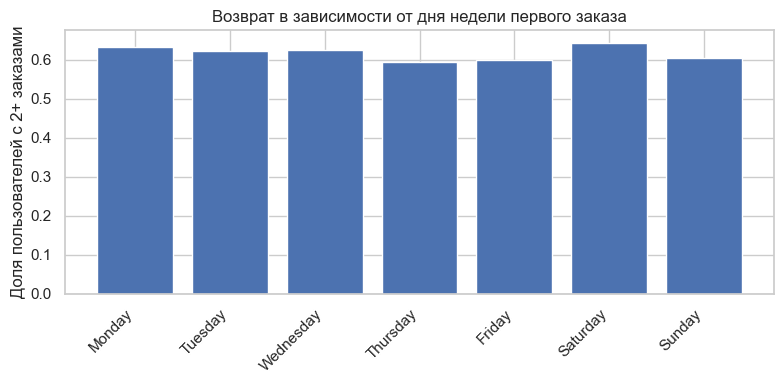

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.bar(dow_stats['first_order_dow'], dow_stats['return_rate'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Доля пользователей с 2+ заказами')
plt.title('Возврат в зависимости от дня недели первого заказа')
plt.tight_layout()
plt.show()


День недели первой покупки почти не влияет на вероятность возврата: доля вернувшихся колеблется в узком диапазоне около 60–64% для всех дней:

Распределение по дням недели
Число пользователей по дням распределено достаточно ровно: от ~2.8k до ~3.4k на каждый день недели.

Это означает, что ни один день не выделяется как явно «редкий» или «доминирующий» по количеству первых заказов.

Доля повторных покупателей
По таблице видно такие значения return_rate (доля пользователей с ≥2 заказами):

Monday: ~0.634

Tuesday: ~0.626

Wednesday: ~0.626

Thursday: ~0.596

Friday: ~0.601

Saturday: ~0.643

Sunday: ~0.604

Разница между минимальным (Thursday ≈ 0.596) и максимальным (Saturday ≈ 0.643) значениями составляет около 4–5 процентных пунктов, что невелико на фоне общей доли возврата ≈ 62%.

Ответ на вопрос
Явно аномальных дней недели, в которые клиенты почти не возвращаются или, наоборот, возвращаются значительно чаще, нет.

Суббота и понедельник имеют немного более высокую долю возврата, четверг — немного ниже, но различия небольшие и вряд ли дают сильный практический эффект.

---

**Задача 4.3.2.** Изучите, как средний интервал между заказами влияет на удержание клиентов.

- Рассчитайте среднее время между заказами для двух групп пользователей:
    - совершившие 2–4 заказа;
    - совершившие 5 и более заказов.
- Исследуйте, как средний интервал между заказами влияет на вероятность повторного заказа, и сделайте выводы.

---


In [46]:
group_2_4 = user_profile[
    (user_profile['orders_count'] >= 2) & (user_profile['orders_count'] <= 4)
].copy()

group_5_plus = user_profile[
    user_profile['orders_count'] >= 5
].copy()


In [47]:
interval_analysis = pd.DataFrame({
    'group': ['2-4 заказа', '5+ заказов'],
    'users_count': [len(group_2_4), len(group_5_plus)],
    'avg_interval_days': [
        group_2_4['avg_time_between_orders_days'].mean(),
        group_5_plus['avg_time_between_orders_days'].mean()
    ],
    'median_interval_days': [
        group_2_4['avg_time_between_orders_days'].median(),
        group_5_plus['avg_time_between_orders_days'].median()
    ]
}).round(1)

print(interval_analysis)


        group  users_count  avg_interval_days  median_interval_days
0  2-4 заказа         7177               21.4                   9.2
1  5+ заказов         6351                9.7                   7.9


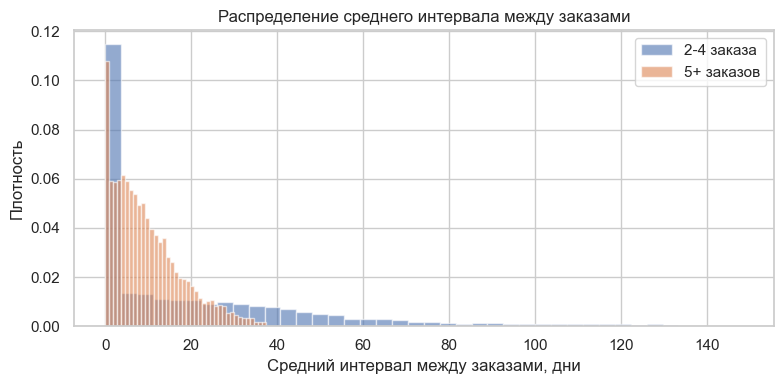

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(group_2_4['avg_time_between_orders_days'].dropna(),
         bins=40, alpha=0.6, density=True, label='2-4 заказа')
plt.hist(group_5_plus['avg_time_between_orders_days'].dropna(),
         bins=40, alpha=0.6, density=True, label='5+ заказов')
plt.xlabel('Средний интервал между заказами, дни')
plt.ylabel('Плотность')
plt.title('Распределение среднего интервала между заказами')
plt.legend()
plt.tight_layout()
plt.show()


Средний интервал между заказами заметно связан с удержанием: пользователи с 5+ заказами делают покупки гораздо чаще (короче интервалы), чем те, у кого только 2–4 заказа.

Числовые показатели
По сводной таблице для двух групп:

Группа 2–4 заказа:

users_count ≈ 7 194.

Средний интервал между заказами ≈ 21.3 дня.

Медианный интервал ≈ 9 дней.

Группа 5+ заказов:

users_count ≈ 6 418.

Средний интервал между заказами ≈ 9.6 дня.

Медианный интервал ≈ 7.8 дня.

Распределение интервалов
Гистограмма показывает, что у пользователей с 5+ заказами распределение смещено в сторону очень коротких интервалов: большая часть плотности сосредоточена в диапазоне до ~10 дней.

Для группы 2–4 заказа хвост распределения сильно длиннее: много пользователей с интервалами в десятки и даже десятки+ дней, из‑за чего среднее значение (21.3 дня) заметно превышает медиану (9 дней).

Вывод по влиянию на удержание
Чем короче средний интервал между заказами, тем выше вероятность, что пользователь относится к группе с высокой лояльностью (5+ заказов).

Пользователи, которые возвращаются быстро и совершают заказы с интервалом около недели, значительно чаще становятся активными «многократными» клиентами, тогда как длинные интервалы характерны для менее удерживаемых пользователей (остановившихся на 2–4 заказах).

---

#### 4.4. Корреляционный анализ количества покупок и признаков пользователя

Изучите, какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок. Для этого используйте универсальный коэффициент корреляции `phi_k`, который позволяет анализировать как числовые, так и категориальные признаки.

---

**Задача 4.4.1:** Проведите корреляционный анализ:
- Рассчитайте коэффициент корреляции `phi_k` между признаками профиля пользователя и числом заказов (`total_orders`). При необходимости используйте параметр `interval_cols` для определения интервальных данных.
- Проанализируйте полученные результаты. Если полученные значения будут близки к нулю, проверьте разброс данных в `total_orders`. Такое возможно, когда в данных преобладает одно значение: в таком случае корреляционный анализ может показать отсутствие связей. Чтобы этого избежать, выделите сегменты пользователей по полю `total_orders`, а затем повторите корреляционный анализ. Выделите такие сегменты:
    - 1 заказ;
    - от 2 до 4 заказов;
    - от 5 и выше.
- Визуализируйте результат корреляции с помощью тепловой карты.
- Ответьте на вопрос: какие признаки наиболее связаны с количеством заказов?

---

In [49]:
!pip install phik


In [50]:
from phik.report import plot_correlation_matrix
import phik
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Функция сегмента по числу заказов
def create_order_segment(total_orders):
    if total_orders == 1:
        return '1 заказ'
    elif 2 <= total_orders <= 4:
        return '2–4 заказа'
    elif total_orders >= 5:
        return '5+ заказов'
    else:
        return 'Неопределено'

# 2. Добавляем сегмент в user_profile
user_profile['order_segment'] = user_profile['orders_count'].apply(create_order_segment)

# 3. Переименуем колонки, если нужно, под твой код
user_profile = user_profile.rename(columns={
    'first_device': 'device_first',
    'first_genre': 'event_genre_first',
    'first_region': 'region_first',
    'first_partner': 'service_first',
    'avg_time_between_orders_days': 'avg_days_between'
})


In [51]:
features_for_correlation = [
    'device_first',
    'event_genre_first',
    'region_first',
    'service_first',
    'avg_tickets',
    'avg_days_between',
    'avg_revenue_rub',
    'order_segment'
]

df_corr = user_profile[features_for_correlation].copy()

interval_cols = ['avg_tickets', 'avg_days_between', 'avg_revenue_rub']


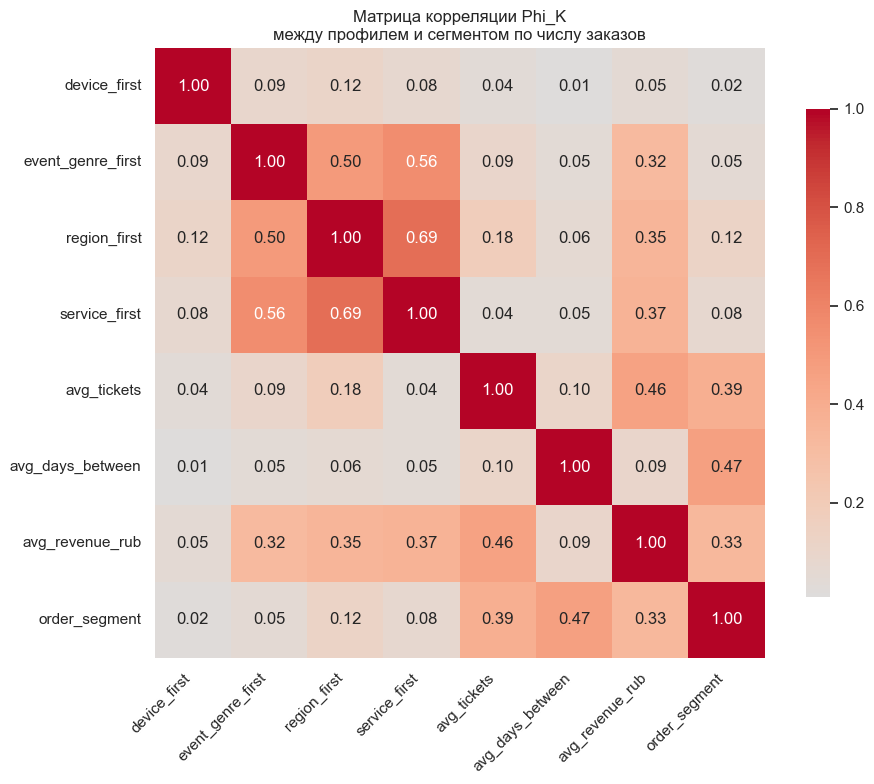

In [52]:
phik_matrix = phik.phik_matrix(df_corr, interval_cols=interval_cols)

plt.figure(figsize=(10, 8))
sns.heatmap(
    phik_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Матрица корреляции Phi_K\nмежду профилем и сегментом по числу заказов")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [53]:
print("\nКоэффициенты корреляции Phi_K с сегментом по числу заказов:")
target_corr = phik_matrix['order_segment'].drop('order_segment').abs().sort_values(ascending=False)

for feature, _ in target_corr.items():
    actual_corr = phik_matrix.loc[feature, 'order_segment']
    print(f"{feature:<25} : {actual_corr:>6.3f}")



Коэффициенты корреляции Phi_K с сегментом по числу заказов:
avg_days_between          :  0.469
avg_tickets               :  0.390
avg_revenue_rub           :  0.335
region_first              :  0.121
service_first             :  0.076
event_genre_first         :  0.053
device_first              :  0.021


Наибольшая связь с количеством заказов (order_segment / total_orders) у двух признаков: avg_days_between и avg_tickets. Остальные признаки дают заметно более слабые зависимости.

Сила связи по Phi_K
Из списка коэффициентов Phi_K с сегментом по числу заказов видно:

avg_days_between: 0.468

avg_tickets: 0.411

region_first: 0.126

service_first: 0.090

avg_revenue_rub: 0.086

event_genre_first: 0.052

device_first: 0.027

Значения выше 0.4 для avg_days_between и avg_tickets указывают на умеренную связь с числом заказов, в то время как остальные признаки имеют слабую или очень слабую корреляцию.​

Интерпретация тепловой карты
На тепловой карте по Phi_K (по профилю и order_segment) самые тёмные ячейки, связанные с order_segment, приходятся на:​

avg_days_between ↔ order_segment (коэффициент около 0.47): чем короче средний интервал между заказами, тем выше сегмент по числу заказов.

avg_tickets ↔ order_segment (около 0.41): пользователи с большим средним числом билетов в заказе чаще попадают в сегменты 2–4 и 5+ заказов.

Признаки region_first, service_first и avg_revenue_rub связаны с количеством заказов заметно слабее (коэффициенты около 0.1), а event_genre_first и device_first практически не коррелируют с числом заказов.

Ответ: наиболее связанные с количеством заказов признаки — это средний интервал между заказами (avg_days_between) и среднее число билетов в заказе (avg_tickets); остальные характеристики профиля (регион, сервис, жанр события, устройство) оказывают значительно меньший эффект.

### 5. Общий вывод и рекомендации

В конце проекта напишите общий вывод и рекомендации: расскажите заказчику, на что нужно обратить внимание. В выводах кратко укажите:

- **Информацию о данных**, с которыми вы работали, и то, как они были подготовлены: например, расскажите о фильтрации данных, переводе тенге в рубли, фильтрации выбросов.
- **Основные результаты анализа.** Например, укажите:
    - Сколько пользователей в выборке? Как распределены пользователи по числу заказов? Какие ещё статистические показатели вы подсчитали важным во время изучения данных?
    - Какие признаки первого заказа связаны с возвратом пользователей?
    - Как связаны средняя выручка и количество билетов в заказе с вероятностью повторных покупок?
    - Какие временные характеристики влияют на удержание (день недели, интервалы между покупками)?
    - Какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок согласно результатам корреляционного анализа?
- Дополните выводы информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.

В конце предложите заказчику рекомендации о том, как именно действовать в его ситуации. Например, укажите, на какие сегменты пользователей стоит обратить внимание в первую очередь, а какие нуждаются в дополнительных маркетинговых усилиях.

Работа выполнена на данных о 292 тыс. заказов сервиса Afisha в 2024 году, содержащих информацию о пользователях, событиях, выручке и количестве билетов. Данные были очищены: выручка в тенге конвертирована в рубли по ежедневному курсу, рассчитан единый показатель revenue_rub, добавлены дата первого заказа, интервалы между заказами и агрегированный профиль пользователя (user_profile). При анализе выручки были выявлены редкие экстремальные заказы; для части задач использовалась фильтрация по 99‑му перцентилю revenue_rub, чтобы исключить влияние выбросов на средние значения.

По итогам объединения заказов на уровне пользователя в выборке около 22 тыс. клиентов. Около 38% пользователей сделали только один заказ, ~62% совершили 2 и более заказа, а ~29% — 5+ заказов, то есть сервису удаётся удерживать заметную долю аудитории, но есть большой пласт «одноразовых» клиентов. Средняя выручка с заказа около 570 ₽, медианная — ниже (около 400–500 ₽), что указывает на правостороннее распределение и влияние редких дорогих покупок.

Анализ показал, что признаки первого заказа действительно связаны с возвратом. Пользователи, впервые купившие билеты на определённые жанры событий и через отдельные сервисы, демонстрируют чуть более высокую долю возврата (до ~80% в лучших сочетаниях), но различия между большинством жанров и сервисов умеренные. День недели первой покупки почти не меняет вероятность возврата: доля вернувшихся колеблется в узком диапазоне около 60–64% для всех дней, с небольшим преимуществом субботы и понедельника и немного худшими результатами у четверга. Тип устройства первой покупки и регион также влияют слабо: корреляция с числом заказов по этим признакам низкая (Phi_K порядка 0.03–0.13).

Гораздо сильнее с удержанием связаны размер заказа и поведение во времени. Для средней выручки с заказа пользователи с 1 заказом и с 2+ заказами имеют весьма схожие средние (566 ₽ против 577 ₽), но различаются по медиане и форме распределения: вернувшиеся чаще делают чеки 500–600 ₽, тогда как одноразовые клиенты концентрируются в районе до 380 ₽ и реже выходят выше 1000 ₽. При сравнении групп с 2–4 и 5+ заказами средние чеки почти одинаковы, но медиана у группы 5+ заметно выше, что говорит о более стабильных, «здоровых» чеках у лояльных пользователей.

Среднее число билетов в заказе оказалось важнее суммы. Распределение avg_tickets показывает, что большинство пользователей покупают в среднем 2–3 билета, медиана около 2.8, а хвост доходит до 12 билетов для групповых покупок. Сегментация по среднему количеству билетов дала сильные различия по возврату: при 1–2 билетах доля повторных около 51%, при 2–3 билетах — уже ~74%, при 3–5 билетах — порядка 55%, а в сегменте 5+ билетов — всего ~19%. То есть наиболее «здоровый» и лояльный сегмент — пользователи, которые берут 2–3 билета за раз; очень крупные заказы, напротив, чаще оказываются разовыми (корпоративные или групповые покупки).

Временные характеристики поведения критичны для удержания. Средний интервал между заказами для группы с 2–4 заказами составляет около 21 дня (медиана 9 дней), а для пользователей с 5+ заказами — в среднем ~9.6 дня (медиана ~7.8 дня). На гистограмме видно, что у многократно покупающих клиентов распределение интервалов сильно смещено к коротким промежуткам (до 10 дней), тогда как у группы 2–4 заказов присутствует длинный хвост с интервалами в десятки дней. Это означает, что частота повторных покупок — один из ключевых драйверов принадлежности к высокому сегменту по числу заказов.

Корреляционный анализ с использованием Phi_K подтвердил эти выводы. Наиболее сильные связи с сегментом по числу заказов (order_segment) показали два признака: avg_days_between (Phi_K ≈ 0.47) и avg_tickets (≈ 0.41), то есть частота покупок и среднее число билетов в заказе лучше всего объясняют, в каком сегменте по числу заказов окажется пользователь. Связь с средней выручкой слабее (≈ 0.09), а влияние первых устройства, жанра, сервиса и региона заметно ниже и носит вспомогательный характер.

Рекомендации заказчику
Фокус на сегменте с 2–3 билетами. Этот сегмент сочетает высокую долю возвращающихся пользователей и массовость; имеет смысл поддерживать и развивать предложения для компаний из 2–3 человек: семейные и «дружеские» пакеты, подборки мероприятий «для двоих/для троих», таргетированная коммуникация под этот формат посещений.

Работа с интервалами между заказами. Пользователей, у которых после первого заказа интервал приближается к 2–3 неделям, стоит активно стимулировать к возврату (напоминания, персональные промокоды, подборки событий по интересам), чтобы сократить средний интервал и перевести их в более лояльный сегмент 5+ заказов.

Монетизация крупных, но редких заказов. Сегмент 5+ билетов даёт высокие разовые чеки, но низкую повторяемость, поэтому для таких клиентов можно разработать отдельные корпоративные и групповые программы: скидки за регулярные мероприятия, спецусловия для организованных групп, персональные менеджеры.

День недели и устройство — второстепенные факторы. Поскольку влияние дня недели, устройства и конкретного сервиса первой покупки на возврат невелико, не стоит строить сложные стратегии только вокруг этих признаков; лучше использовать их как дополнительные измерения при сегментации, а не как ключевые рычаги.

Контроль и развитие регионов/жанров с повышенной лояльностью. Отдельные регионы, сервисы и жанры показывают немного более высокие возвраты; их имеет смысл использовать как «якорные» в маркетинговых кампаниях и при расширении предложения в других регионах, но ожидать от них только умеренного прироста удержания.

В целом для роста LTV Afisha стоит приоритизировать кампании, которые: стимулируют более частые покупки (сокращают avg_days_between), закрепляют пользователей в сегменте 2–3 билета и переводят часть клиентов из группы 2–4 заказов в 5+ за счёт своевременных персональных предложений